<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/Banking%20Dataset%20Analysis%20and%20Classification/bank_eda_starting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries & data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/Train-Set.csv')
test = pd.read_csv('/content/Test-Set.csv')

In [ ]:
train.head()

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,56963,31963,47,blue-collar,married,basic.9y,no,NaN,no,yes,cellular,apr,fri,583,2,999,1,failure,no
1,31753,21378,48,management,divorced,tertiary,no,351.0,yes,no,cellular,7,apr,725,3,-1,0,unknown,no
2,60854,17084,38,technician,single,high.school,no,NaN,no,no,cellular,aug,wed,74,2,999,0,nonexistent,no
3,34207,81693,50,management,divorced,tertiary,no,1270.0,yes,no,cellular,4,may,24,3,-1,0,unknown,no
4,73066,63978,54,self-employed,married,high.school,no,NaN,yes,yes,cellular,aug,thu,904,3,999,0,nonexistent,yes


In [ ]:
train.columns

Index(['Unnamed: 0', 'id', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'Target'],
      dtype='object')

<Axes: xlabel='marital', ylabel='age'>

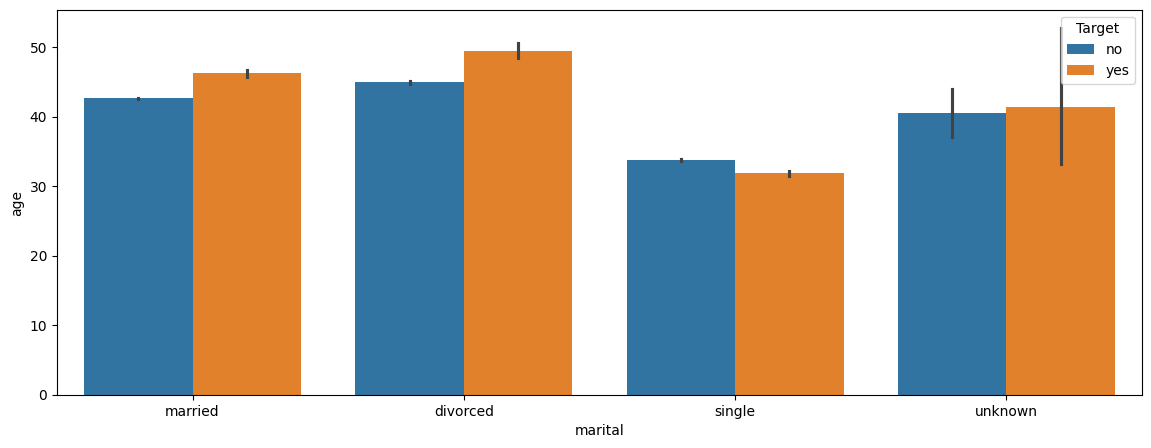

In [ ]:
plt.figure(figsize=(14,5))
sns.barplot(x='marital', y='age', data=train, hue='Target')

<Axes: xlabel='loan', ylabel='count'>

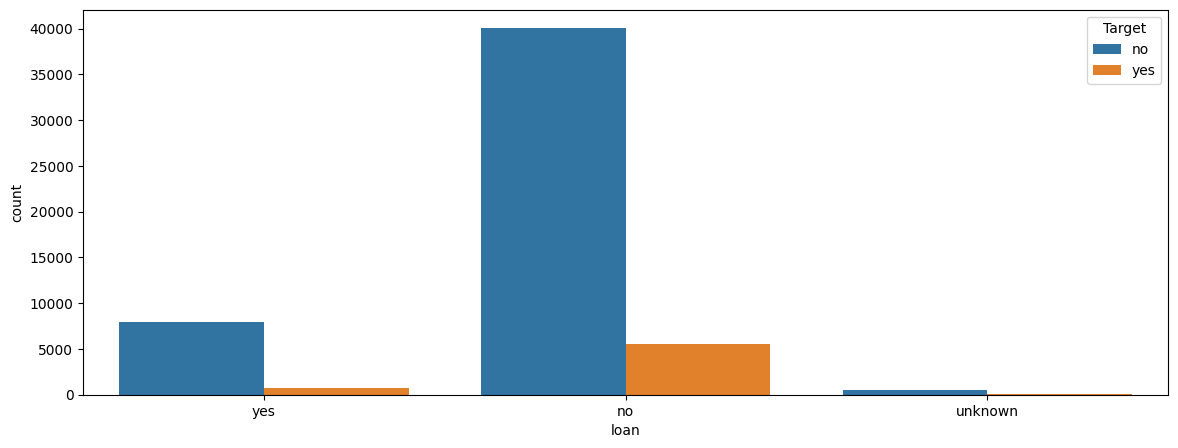

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x='loan', data=train, hue='Target')

<Axes: xlabel='marital', ylabel='duration'>

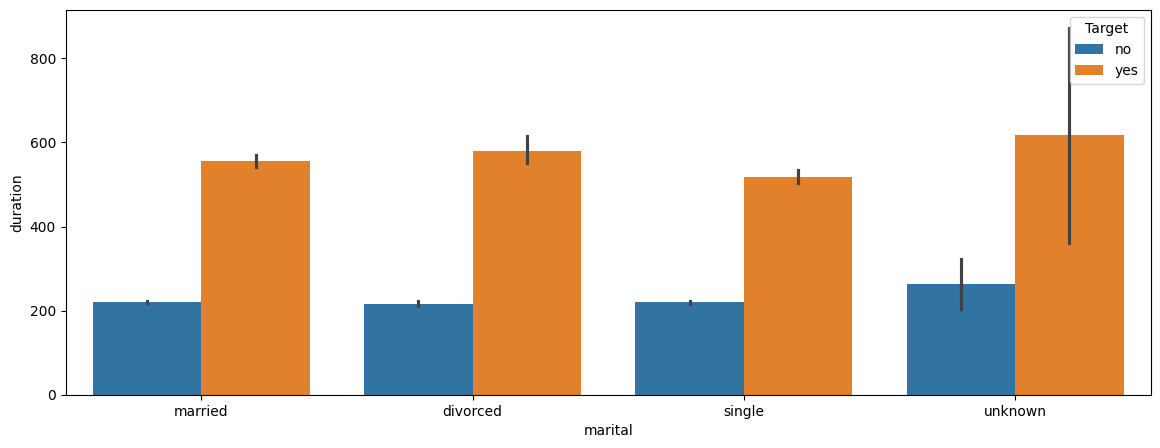

In [ ]:
plt.figure(figsize=(14,5))
sns.barplot(x='marital', y='duration', data=train, hue='Target')

In [ ]:
train.tail(2)

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
54710,43567,782,70,retired,married,secondary,no,616.0,no,no,cellular,27,apr,149,2,182,1,failure,no
54711,68268,27312,51,retired,married,basic.4y,no,NaN,no,no,cellular,jul,wed,1057,1,13,1,success,no


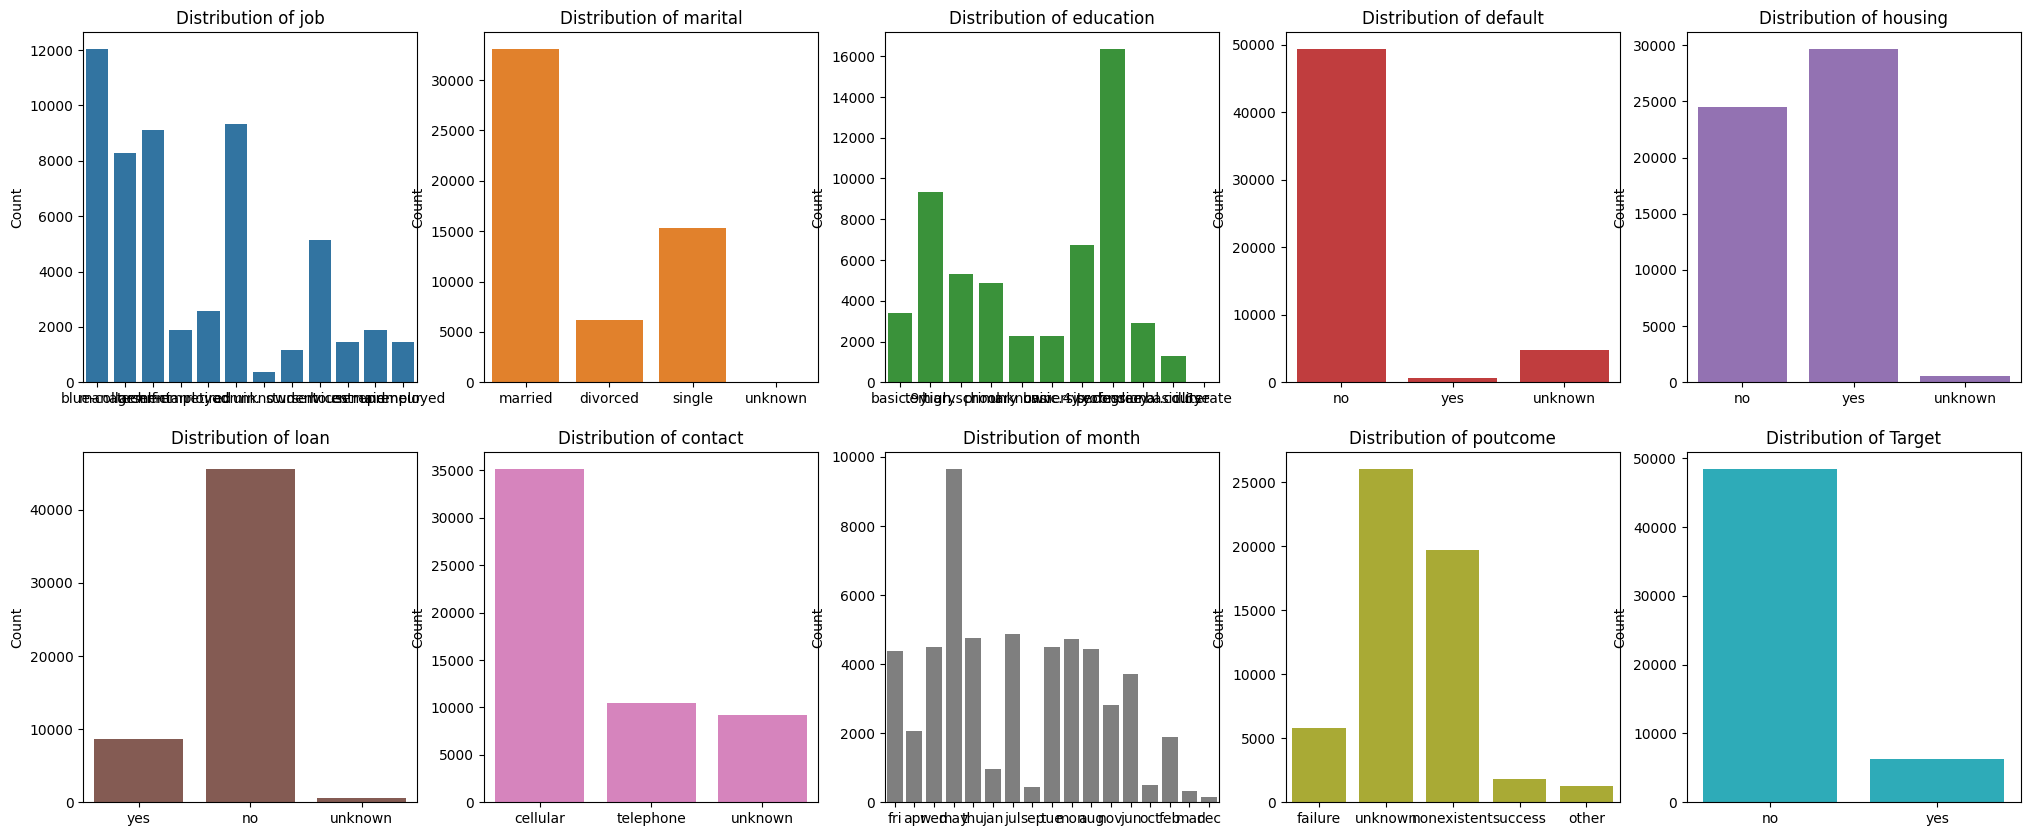

In [ ]:
# countplots for the categorical columns

categorical_columns = ['job', 'marital', 'education', 'default',  'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']


x_cat = 2
y_cat = 5

fig, ax = plt.subplots(x_cat, y_cat, figsize=(25, 10))

colors_cat = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b',
           '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i in range(x_cat):
    for j in range(y_cat):
        column = categorical_columns[i*y_cat + j]
        sns.countplot(x=column, data=train, ax=ax[i, j], color=colors_cat[i*y_cat + j])
        ax[i, j].set_title(f'Distribution of {column}')
        ax[i, j].set_xlabel('')
        ax[i, j].set_ylabel('Count')

plt.show()


In [ ]:
train['job'].value_counts()

job
blue-collar      12042
admin.            9346
technician        9122
management        8292
services          5148
retired           2557
self-employed     1883
entrepreneur      1876
unemployed        1463
housemaid         1457
student           1150
unknown            376
Name: count, dtype: int64

In [ ]:
train['education'].value_counts()

education
secondary              16357
tertiary                9313
university.degree       6741
high.school             5292
primary                 4854
basic.9y                3380
professional.course     2925
unknown                 2276
basic.4y                2256
basic.6y                1306
illiterate                12
Name: count, dtype: int64

In [ ]:
train['contact'].value_counts()

contact
cellular     35134
telephone    10424
unknown       9154
Name: count, dtype: int64

In [ ]:
train['month'].value_counts()

month
may    9651
jul    4875
thu    4758
mon    4728
wed    4508
tue    4483
aug    4437
fri    4393
jun    3720
nov    2815
apr    2076
feb    1878
jan     972
oct     500
sep     432
mar     335
dec     151
Name: count, dtype: int64

In [ ]:
train['poutcome'].value_counts()

poutcome
unknown        26057
nonexistent    19704
failure         5809
success         1855
other           1287
Name: count, dtype: int64

In [ ]:
train['Target'].value_counts()

Target
no     48433
yes     6279
Name: count, dtype: int64

## missing values

In [ ]:
train.isna().sum()

Unnamed: 0        0
id                0
age               0
job               0
marital           0
education         0
default           0
balance       22870
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
Target            0
dtype: int64

<Axes: >

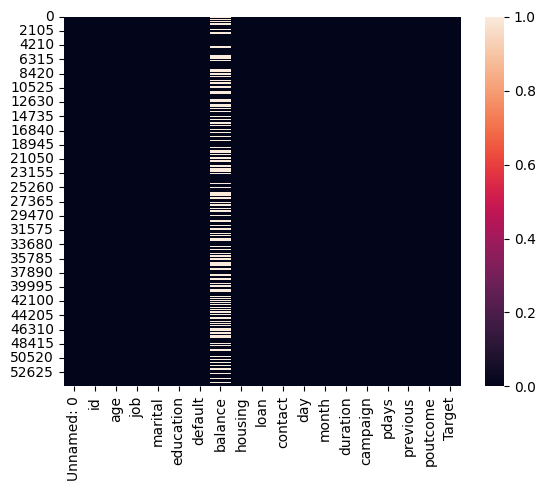

In [ ]:
sns.heatmap(train.isna())

<Axes: >

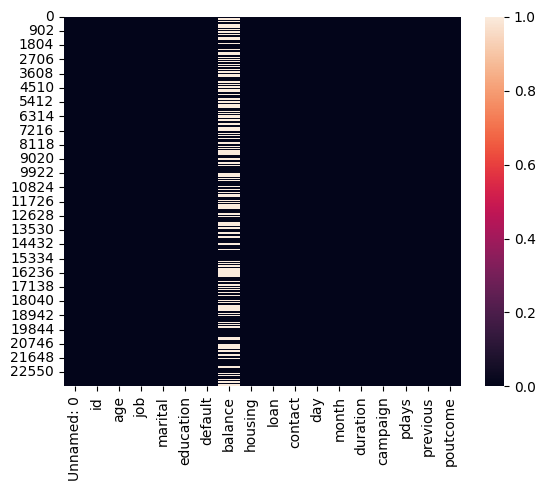

In [ ]:
sns.heatmap(test.isna())

In [ ]:
train.tail(2)

,Unnamed: 0,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
54710,43567,782,70,retired,married,secondary,no,616.0,no,no,cellular,27,apr,149,2,182,1,failure,no
54711,68268,27312,51,retired,married,basic.4y,no,NaN,no,no,cellular,jul,wed,1057,1,13,1,success,no


In [ ]:
train.drop(['balance', 'Unnamed: 0', 'id', 'day', 'month'], axis=1, inplace=True)
test.drop(['balance', 'Unnamed: 0', 'id', 'day', 'month'], axis=1, inplace=True)

## Encoding

In [ ]:
numerical_columns = train.select_dtypes(include=['number']).columns.tolist()
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
numerical_columns_test = test.select_dtypes(include=['number']).columns.tolist()
categorical_columns_test = test.select_dtypes(include=['object']).columns.tolist()

# one hot encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encodings = encoder.fit_transform(train[categorical_columns_test])
encodings_df = pd.DataFrame(encodings, columns=encoder.get_feature_names_out())

train_data_encoded = pd.concat([train, encodings_df], axis=1 )
train_data_encoded  = train_data_encoded.drop(categorical_columns, axis=1)

encoding_test = encoder.transform(test[categorical_columns_test])
encoding_test = pd.DataFrame(encoding_test, columns=encoder.get_feature_names_out())
test_data_encoded = pd.concat([test, encoding_test], axis=1 )
test_data_encoded = test_data_encoded.drop(categorical_columns_test, axis=1)

train_data_encoded['Target'] = train['Target']

In [ ]:
# train_data_encoded = pd.get_dummies(train, columns=categorical_columns_test, drop_first=True)
# test_data_encoded = pd.get_dummies(test, columns=categorical_columns_test, drop_first=True)


In [ ]:
train_data_encoded.shape , test_data_encoded.shape

((54712, 50), (23449, 49))

In [ ]:
train_data_encoded.head(2)

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_nonexistent,poutcome_other,poutcome_success,poutcome_unknown,Target
0,47,583,2,999,1,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,no
1,48,725,3,-1,0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,no


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV,  RandomizedSearchCV
X = train_data_encoded.drop(['Target'],axis=1)
y = train_data_encoded['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=50)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=0)  # Common parameters
model.fit(X_train, y_train)
pred_logistic = model.predict(X_test)

print('Logistic Regression')
print("precision_score", precision_score(y_test, pred_logistic, pos_label='yes'))
print("recall_score", recall_score(y_test, pred_logistic , pos_label='yes'))
print("accuracy_score", accuracy_score(y_test, pred_logistic ))
print("F1 score:", f1_score(y_test, pred_logistic , pos_label='yes'))

Logistic Regression
precision_score 0.6753670473083198
recall_score 0.3344103392568659
accuracy_score 0.9065155807365439
F1 score: 0.44732576985413286


In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_svm = clf.predict(X_test)

print('Logistic Regression')
print("precision_score", precision_score(y_test, pred_svm, pos_label='yes'))
print("recall_score", recall_score(y_test, pred_svm , pos_label='yes'))
print("accuracy_score", accuracy_score(y_test, pred_svm ))
print("F1 score:", f1_score(y_test, pred_svm , pos_label='yes'))

Logistic Regression
precision_score 0.6203007518796992
recall_score 0.1332794830371567
accuracy_score 0.8927168052636388
F1 score: 0.2194148936170213


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
clf = HistGradientBoostingClassifier(max_iter=100).fit(X_train, y_train)

pred_svm = clf.predict(X_test)

print('Logistic Regression')
print("precision_score", precision_score(y_test, pred_svm, pos_label='yes'))
print("recall_score", recall_score(y_test, pred_svm , pos_label='yes'))
print("accuracy_score", accuracy_score(y_test, pred_svm ))
print("F1 score:", f1_score(y_test, pred_svm , pos_label='yes'))

Logistic Regression
precision_score 0.6293436293436293
recall_score 0.3949919224555735
accuracy_score 0.9052362240701819
F1 score: 0.4853598014888338


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=50, random_state=0).fit(X_train, y_train)

pred_svm = clf.predict(X_test)

print('Logistic Regression')
print("precision_score", precision_score(y_test, pred_svm, pos_label='yes'))
print("recall_score", recall_score(y_test, pred_svm , pos_label='yes'))
print("accuracy_score", accuracy_score(y_test, pred_svm ))
print("F1 score:", f1_score(y_test, pred_svm , pos_label='yes'))

Logistic Regression
precision_score 0.5850785340314136
recall_score 0.36106623586429726
accuracy_score 0.8987480581193457
F1 score: 0.4465534465534466


# underSampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2,random_state=50)


In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, random_state=0)  # Common parameters
model.fit(X_train, y_train)
pred_logistic = model.predict(X_test)

print('Logistic Regression')
print("precision_score", precision_score(y_test, pred_logistic, pos_label='yes'))
print("recall_score", recall_score(y_test, pred_logistic , pos_label='yes'))
print("accuracy_score", accuracy_score(y_test, pred_logistic ))
print("F1 score:", f1_score(y_test, pred_logistic , pos_label='yes'))

Logistic Regression
precision_score 0.8268109908409659
recall_score 0.7806603773584906
accuracy_score 0.8061305732484076
F1 score: 0.8030731904569348


In [ ]:
train

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,Target
0,47,blue-collar,married,basic.9y,no,no,yes,cellular,583,2,999,1,failure,no
1,48,management,divorced,tertiary,no,yes,no,cellular,725,3,-1,0,unknown,no
2,38,technician,single,high.school,no,no,no,cellular,74,2,999,0,nonexistent,no
3,50,management,divorced,tertiary,no,yes,no,cellular,24,3,-1,0,unknown,no
4,54,self-employed,married,high.school,no,yes,yes,cellular,904,3,999,0,nonexistent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54707,35,management,married,tertiary,no,yes,no,cellular,233,12,-1,0,unknown,no
54708,31,services,married,high.school,no,no,no,telephone,636,6,999,0,nonexistent,no
54709,35,management,married,tertiary,no,no,no,cellular,261,2,-1,0,unknown,yes
54710,70,retired,married,secondary,no,no,no,cellular,149,2,182,1,failure,no
